<a href="https://colab.research.google.com/github/mehmetkesik/tensorflow-computer-vision/blob/main/tensorflow_computer_vision_Food101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food101 vision with TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
import sklearn

tf.__version__

'2.9.2'

In [ ]:
# Download helper functions
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exist, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mehmetkesik/tensorflow-basics/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import *

In [ ]:
# 10 Food classes for multi-class classification, 10% of data
if Path("10_food_classes_10_percent").is_dir():
    print("10_food_classes_10_percent already exist, skipping donwload...")
else:
    import zipfile

    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

    unzip_data("10_food_classes_10_percent.zip")

--2022-11-30 13:33:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   173MB/s    in 0.9s    

2022-11-30 13:33:07 (173 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
# Download some custom images
if not Path("03-hamburger.jpeg").is_file():
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
if not Path("03-steak.jpeg").is_file():
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
if not Path("03-pizza-dad.jpeg").is_file():
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
if not Path("03-sushi.jpeg").is_file():
    !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-11-30 13:33:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2022-11-30 13:33:20 (78.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-11-30 13:33:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
IMG_SIZE = (224, 224)

train_data = image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical"
)

test_data = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical"
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### Data augmentation layer

In [ ]:
augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.Rescaling(1./255)
], name="data_augmentation")

10_food_classes_10_percent/train/steak/3173444.jpg


(-0.5, 430.5, 604.5, -0.5)

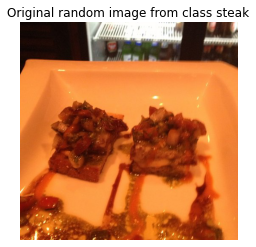

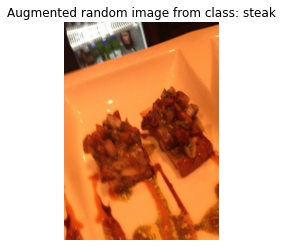

In [ ]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data.class_names)
target_dir = "10_food_classes_10_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

# Read and plot in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = augmentation(img, training=True)
plt.figure()
plt.imshow(augmented_img)
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)

## Create Model_1

In [ ]:
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.Input(shape=input_shape, name="input_layer")

x = inputs#augmentation(inputs, training=True)

x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_0.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Create model checkpoint to save weights
checkpoint_path = "ten_percent_model_checkpoint_weights/checkpoint.ckpt"

checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=False,
                                                      save_freq="epoch",
                                                      verbose=1)

In [ ]:
# Fit the model saving checkpoint every epoch
initial_epoch = 5

history_0 = model_0.fit(train_data,
                        epochs=initial_epoch,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_0"),
                                   checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_0/20221130-135419
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.7948 - accuracy: 0.4627
Epoch 1: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 94s 4s/step - loss: 1.7948 - accuracy: 0.4627 - val_loss: 1.2285 - val_accuracy: 0.7451
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.0332 - accuracy: 0.7800
Epoch 2: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 86s 4s/step - loss: 1.0332 - accuracy: 0.7800 - val_loss: 0.8286 - val_accuracy: 0.8372
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.7457 - accuracy: 0.8320
Epoch 3: saving model to ten_percent_model_checkpoint_weights/checkpoint.ckpt
24/24 [==============================] - 89s 4s/step - loss: 0.7457 - accuracy: 0.8320 - val_loss: 0.6715 - val_accuracy: 0.8487
Epoch 4/5
24/24 [========

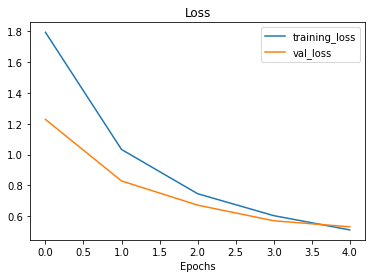

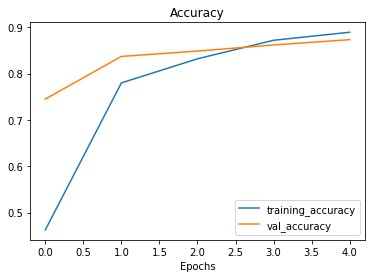

In [ ]:
plot_loss_curves(history_0)

In [ ]:
model_0.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_0.evaluate(test_data)
loaded_weights_model_results

79/79 [==============================] - 158s 2s/step - loss: 0.5491 - accuracy: 0.8664


[0.549125611782074, 0.8664000034332275]

In [ ]:
print(len(model_0.layers[2].trainable_variables))

0


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-100]:
  layer.trainable = False

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
#for layer_number, layer in enumerate(model_0.layers[1].layers):
#  print(layer_number, layer.name, layer.trainable)

0 input_7 False
1 rescaling_9 False
2 normalization_6 False
3 tf.math.truediv_6 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
fine_tune_epochs = initial_epoch + 5

history_1 = model_0.fit(train_data,
                        epochs=fine_tune_epochs,
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        initial_epoch=history_0.epoch[-1],
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="model_1")])

Saving TensorBoard log files to: transfer_learning/model_1/20221130-140816
Epoch 5/10
24/24 [==============================] - 167s 5s/step - loss: 0.3921 - accuracy: 0.8853 - val_loss: 0.4084 - val_accuracy: 0.8618


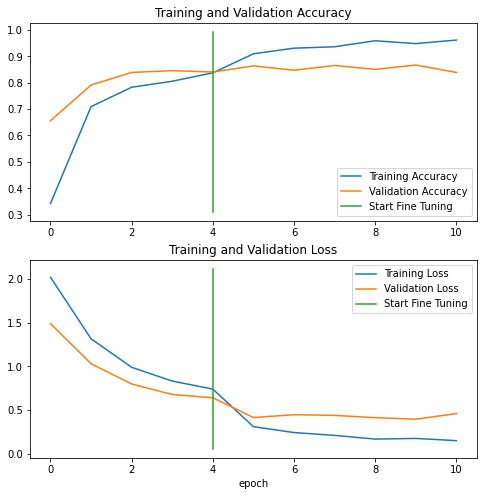

In [ ]:
compare_historys(original_history=history_0, new_history=history_1)